In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from useful_scit.imps import *
import check_input_01_funs as pp
from check_input_01_funs import *

In [4]:
path = '/wrk/kadantse/wrfimp_longrun/wrf'
out_path = '/proj/atm/saltena/runs/run_2019_05_15/wrf'
fn_low = 'wrflowinp_d01'
fn_inp = 'wrfinput_d01'
file_out = os.path.join(out_path,fn_low)

In [5]:
glob.glob(path+'/wrf*')

['/Volumes/mbProD/Downloads/wrf_small_files/wrfbdy_d0_short',
 '/Volumes/mbProD/Downloads/wrf_small_files/wrffdda_d0_short',
 '/Volumes/mbProD/Downloads/wrf_small_files/wrfinput_d01',
 '/Volumes/mbProD/Downloads/wrf_small_files/wrflowinp_d01']

In [6]:
xr.set_options(keep_attrs=True)
file_path = os.path.join(path,fn_low)
file_input = os.path.join(path,fn_inp)
xa_help =  import_lowinp('/tmp/xa1',file_input)
xa_raw = xr.open_dataset(file_path)
xa_cop = xa_raw.copy()

In [7]:
dims = ['south_north','west_east']
sst = 'SST'
si = 'SEAICE'

In [8]:
xa_cop[sst] = xa_cop[sst].where(xa_cop[si]==0) 
xa_cop[sst] = xa_cop[sst].interpolate_na(dim='Time',method='linear')
xa_cop[sst].attrs = xa_raw[sst].attrs
xa_cop[si]=xa_cop[si].where(xa_cop[si]==0,0.0)
xa_cop[si].attrs = xa_raw[si].attrs

In [9]:
b_l = xa_help['LAKEMASK']==1
b_l = b_l.drop('XLONG').drop('XLAT')
b_t = xa_cop[sst]>307

In [10]:
xa_cop[sst]=xa_cop[sst].where(~(b_t & b_l))
xa_cop[sst] = xa_cop[sst].interpolate_na(dim='Time',method='linear')
xa_cop[sst].attrs = xa_raw[sst].attrs

In [13]:
try: os.remove(file_out)
except: pass
xa_cop.to_netcdf(file_out)

In [14]:
xa_low_new = import_lowinp(file_out,file_input)

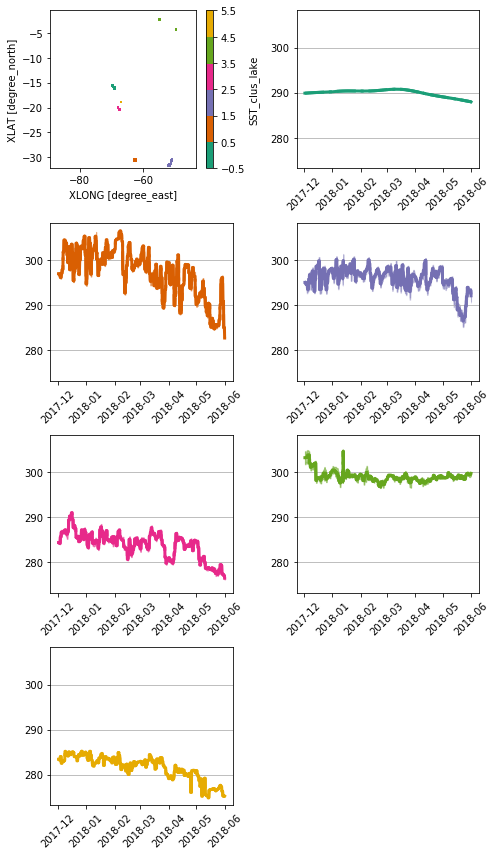

In [15]:
x1 = xa_low_new.where(xa_low_new.LAKEMASK==1)
p = 'SST'
nc = 6
p_c = p+'_clus_lake'
cols = 2
plot_clus_sig(x1,p,p_c,nc,cols=2)

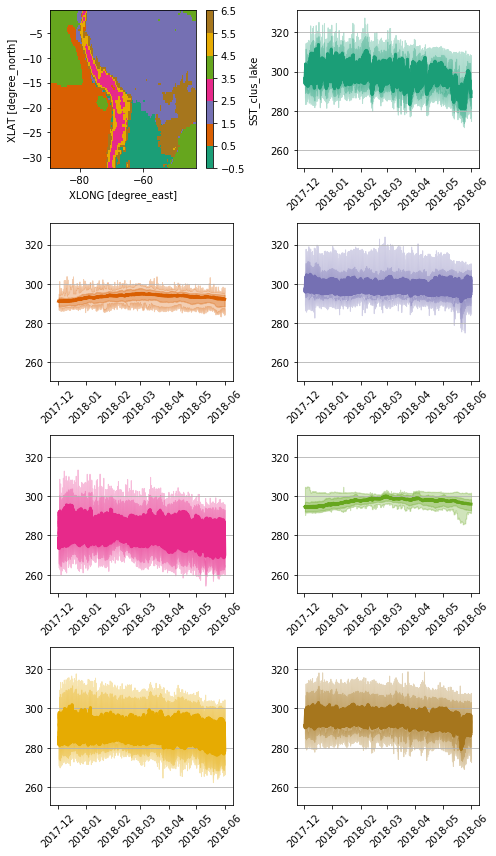

In [16]:
x1 = xa_low_new
p = 'SST'
nc = 7
p_c = p+'_clus_lake'
cols = 2
plot_clus_sig(x1,p,p_c,nc,cols=2)